# Customer Churn Classification






## Introduction

In todays commercial world competition is high and every customer is valuable. Understanding the customer is of utmost importance, including being able to understand the behavior patterns of that customer. Customer Churn is the rate at which a commercial customer leaves the commercial business and takes their money elsewhere. Understanding customer churn is vital to the success of a company and a churn analysis is the first step to understanding the customer.


This notebook presents a customer churn classification project using **Logistic Regression**, **Support Vector Machines**, **Decision Tree**, **Random Forest**, **XGBoost** and **CatBoost** models. The goal is to clasify whether customers will churn (leave) a subscription-based service.

## Imports and Setup
Import necessary libraries and set up configurations.

In [68]:
pip install catboost

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

## Data Loading
Load the customer churn dataset, inspect its structure.

In [3]:
df = pd.read_excel('https://github.com/Shahbozjon/customer_churn_analysis/blob/main/data/E_Commerce_Dataset.xlsx?raw=true', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [7]:
description = pd.read_excel('/content/data/E_Commerce_Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


## Data Analysis
Number of rows are 5630 and there are some missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-8-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [9]:
df['Churn'].value_counts() / len(df) * 100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

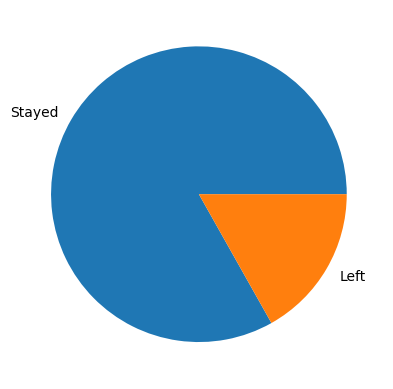

In [10]:
plt.pie(df['Churn'].value_counts(), labels=['Stayed', 'Left'])
plt.show()

## Exploratory Data Analysis (EDA)
Explore the dataset using visualizations and descriptive statistics.

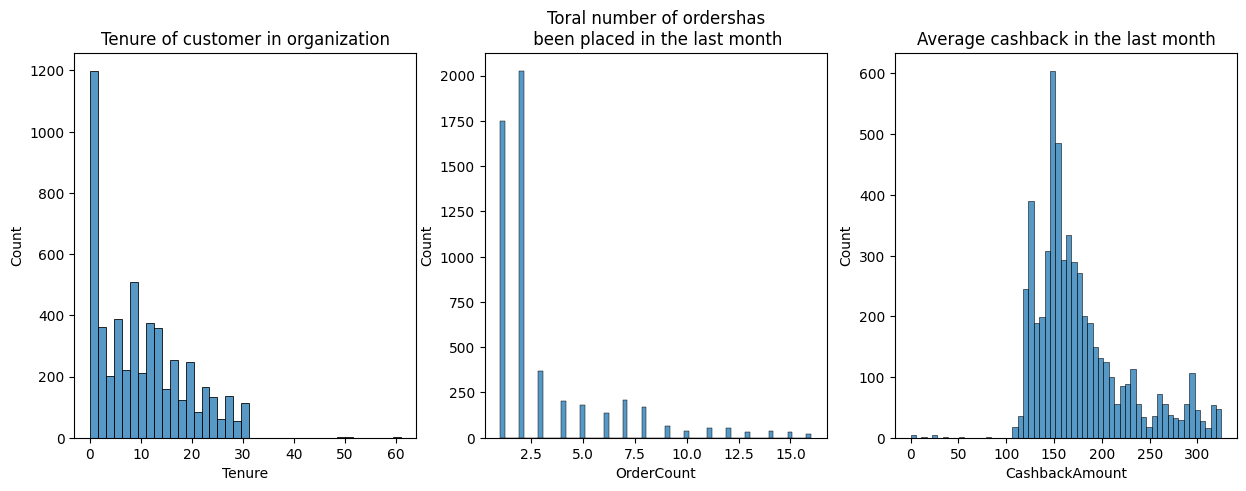

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df, x='Tenure', ax=axes[0])
axes[0].set_title('Tenure of customer in organization')

sns.histplot(data=df, x='OrderCount', ax=axes[1])
axes[1].set_title('Toral number of ordershas\n been placed in the last month')

sns.histplot(data=df, x='CashbackAmount', ax=axes[2])
axes[2].set_title('Average cashback in the last month')

plt.show()

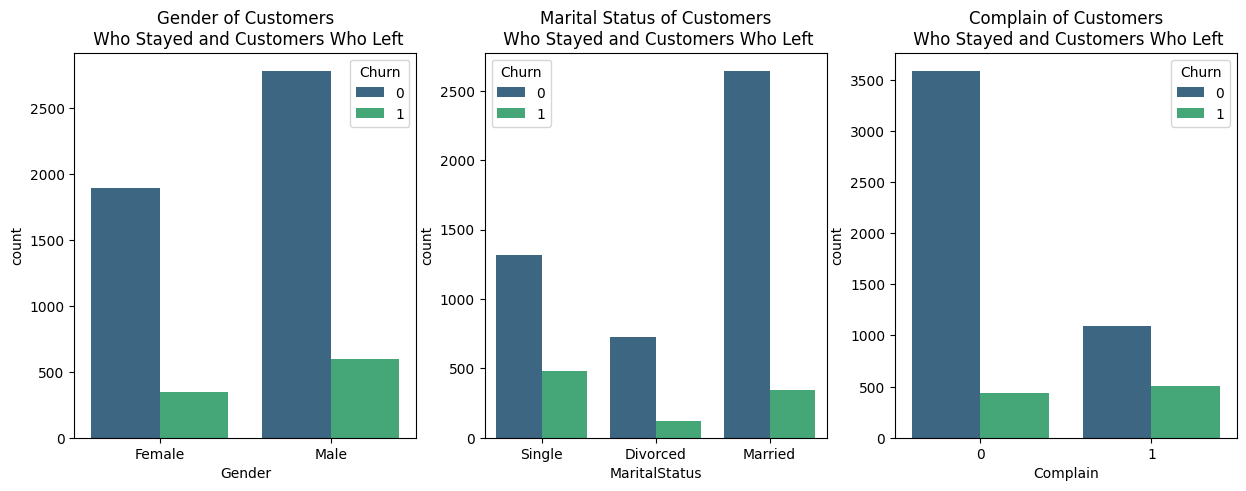

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.countplot(data=df, x='Gender', hue='Churn', palette='viridis', ax=axes[0])
axes[0].set_title("Gender of Customers\n Who Stayed and Customers Who Left")

sns.countplot(data=df, x='MaritalStatus', hue='Churn', palette='viridis', ax=axes[1])
axes[1].set_title("Marital Status of Customers\n Who Stayed and Customers Who Left")

sns.countplot(data=df, x='Complain', hue='Churn', palette='viridis', ax=axes[2])
axes[2].set_title("Complain of Customers\n Who Stayed and Customers Who Left")

plt.show()

In [21]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-21-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

## Feature Engineering and Data Cleaning


In [31]:
#quantity of missing values
print(f"Quantity of missing values: {df.isnull().sum().sum()}")
#quantity of missing rows
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Quantity of missing rows: {missing_rows}")
#proportion of rows
print(f"Quantity of missing rows %: {np.round(missing_rows/len(df)*100)}%")

Quantity of missing values: 1856
Quantity of missing rows: 1856
Quantity of missing rows %: 33.0%


In [32]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [33]:
#quantity of missing values
print(f"Quantity of missing values: {data.isnull().sum().sum()}")
#quantity of missing rows
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Quantity of missing rows: {missing_rows}")
#proportion of rows
print(f"Quantity of missing rows %: {np.round(missing_rows/len(data)*100)}%")

Quantity of missing values: 571
Quantity of missing rows: 571
Quantity of missing rows %: 10.0%


In [35]:
data = data.dropna()
data.shape

(5059, 7)

In [36]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64

## Preparing for ML

In [37]:
data

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,Single,Female
3,1,0.0,0,3.0,134.07,Single,Male
4,1,0.0,0,3.0,129.60,Single,Male
5,1,0.0,1,7.0,139.19,Single,Female
8,1,13.0,1,2.0,126.83,Divorced,Male
...,...,...,...,...,...,...,...
5624,0,1.0,0,1.0,154.66,Single,Female
5625,0,10.0,0,4.0,150.71,Married,Male
5627,0,1.0,1,4.0,186.42,Married,Male
5628,0,23.0,0,9.0,178.90,Married,Male


In [39]:
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1


In [44]:
X = encoded.drop('Churn', axis=1)
y = encoded['Churn']

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Model Building and Evaluation

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Model accuracy :  0.8794466403162056


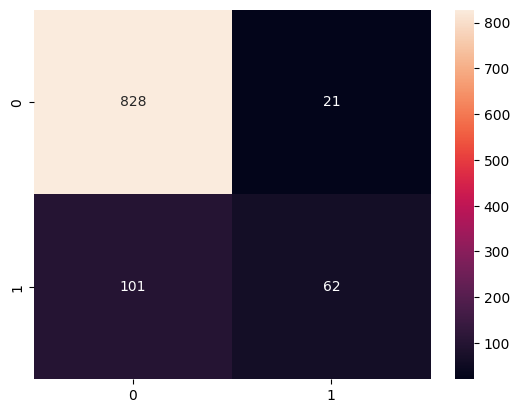

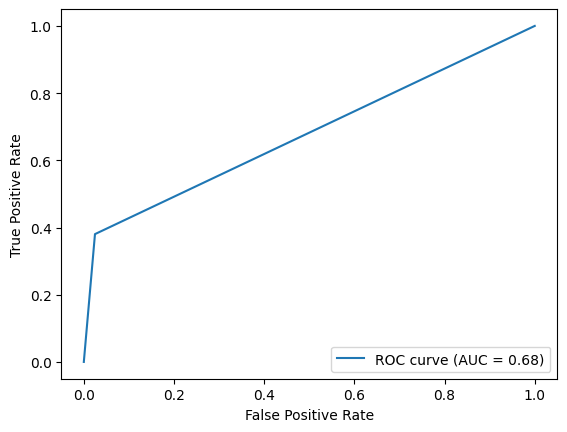

In [52]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Model accuracy : ', metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## Support Vector Machines

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model accuracy :  0.8636363636363636


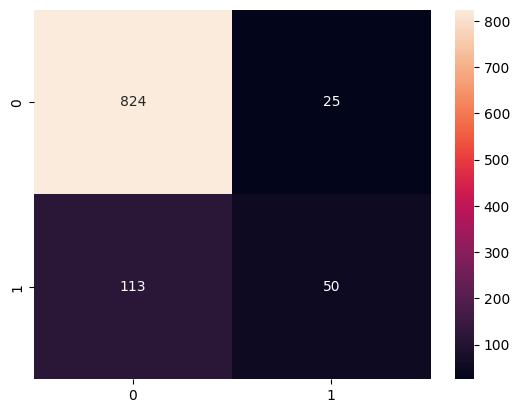

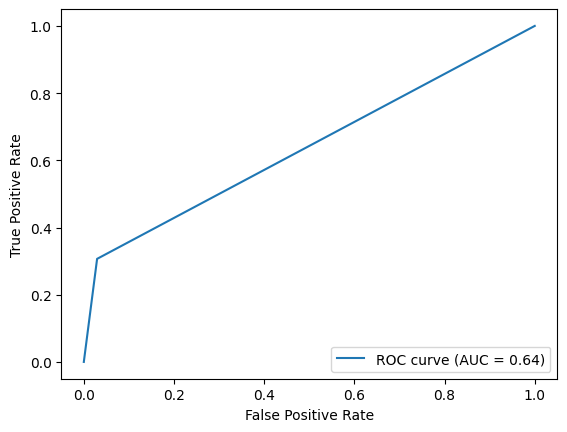

In [58]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Model accuracy : ', metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.85      0.89      0.87       163

    accuracy                           0.96      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Model accuracy :  0.9565217391304348


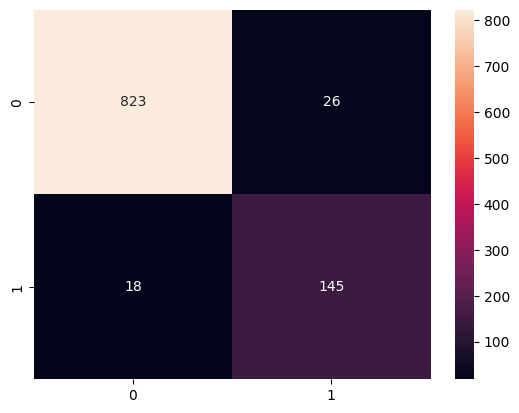

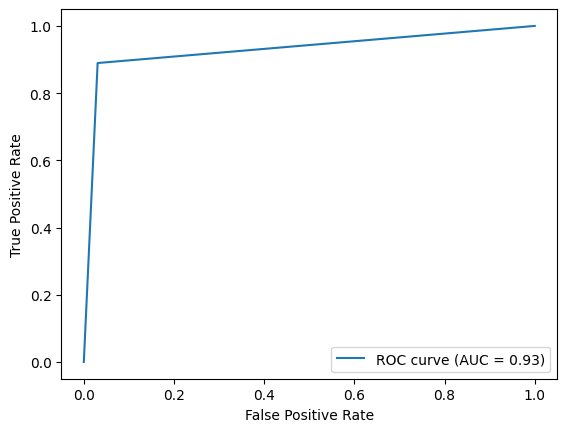

In [59]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Model accuracy : ', metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

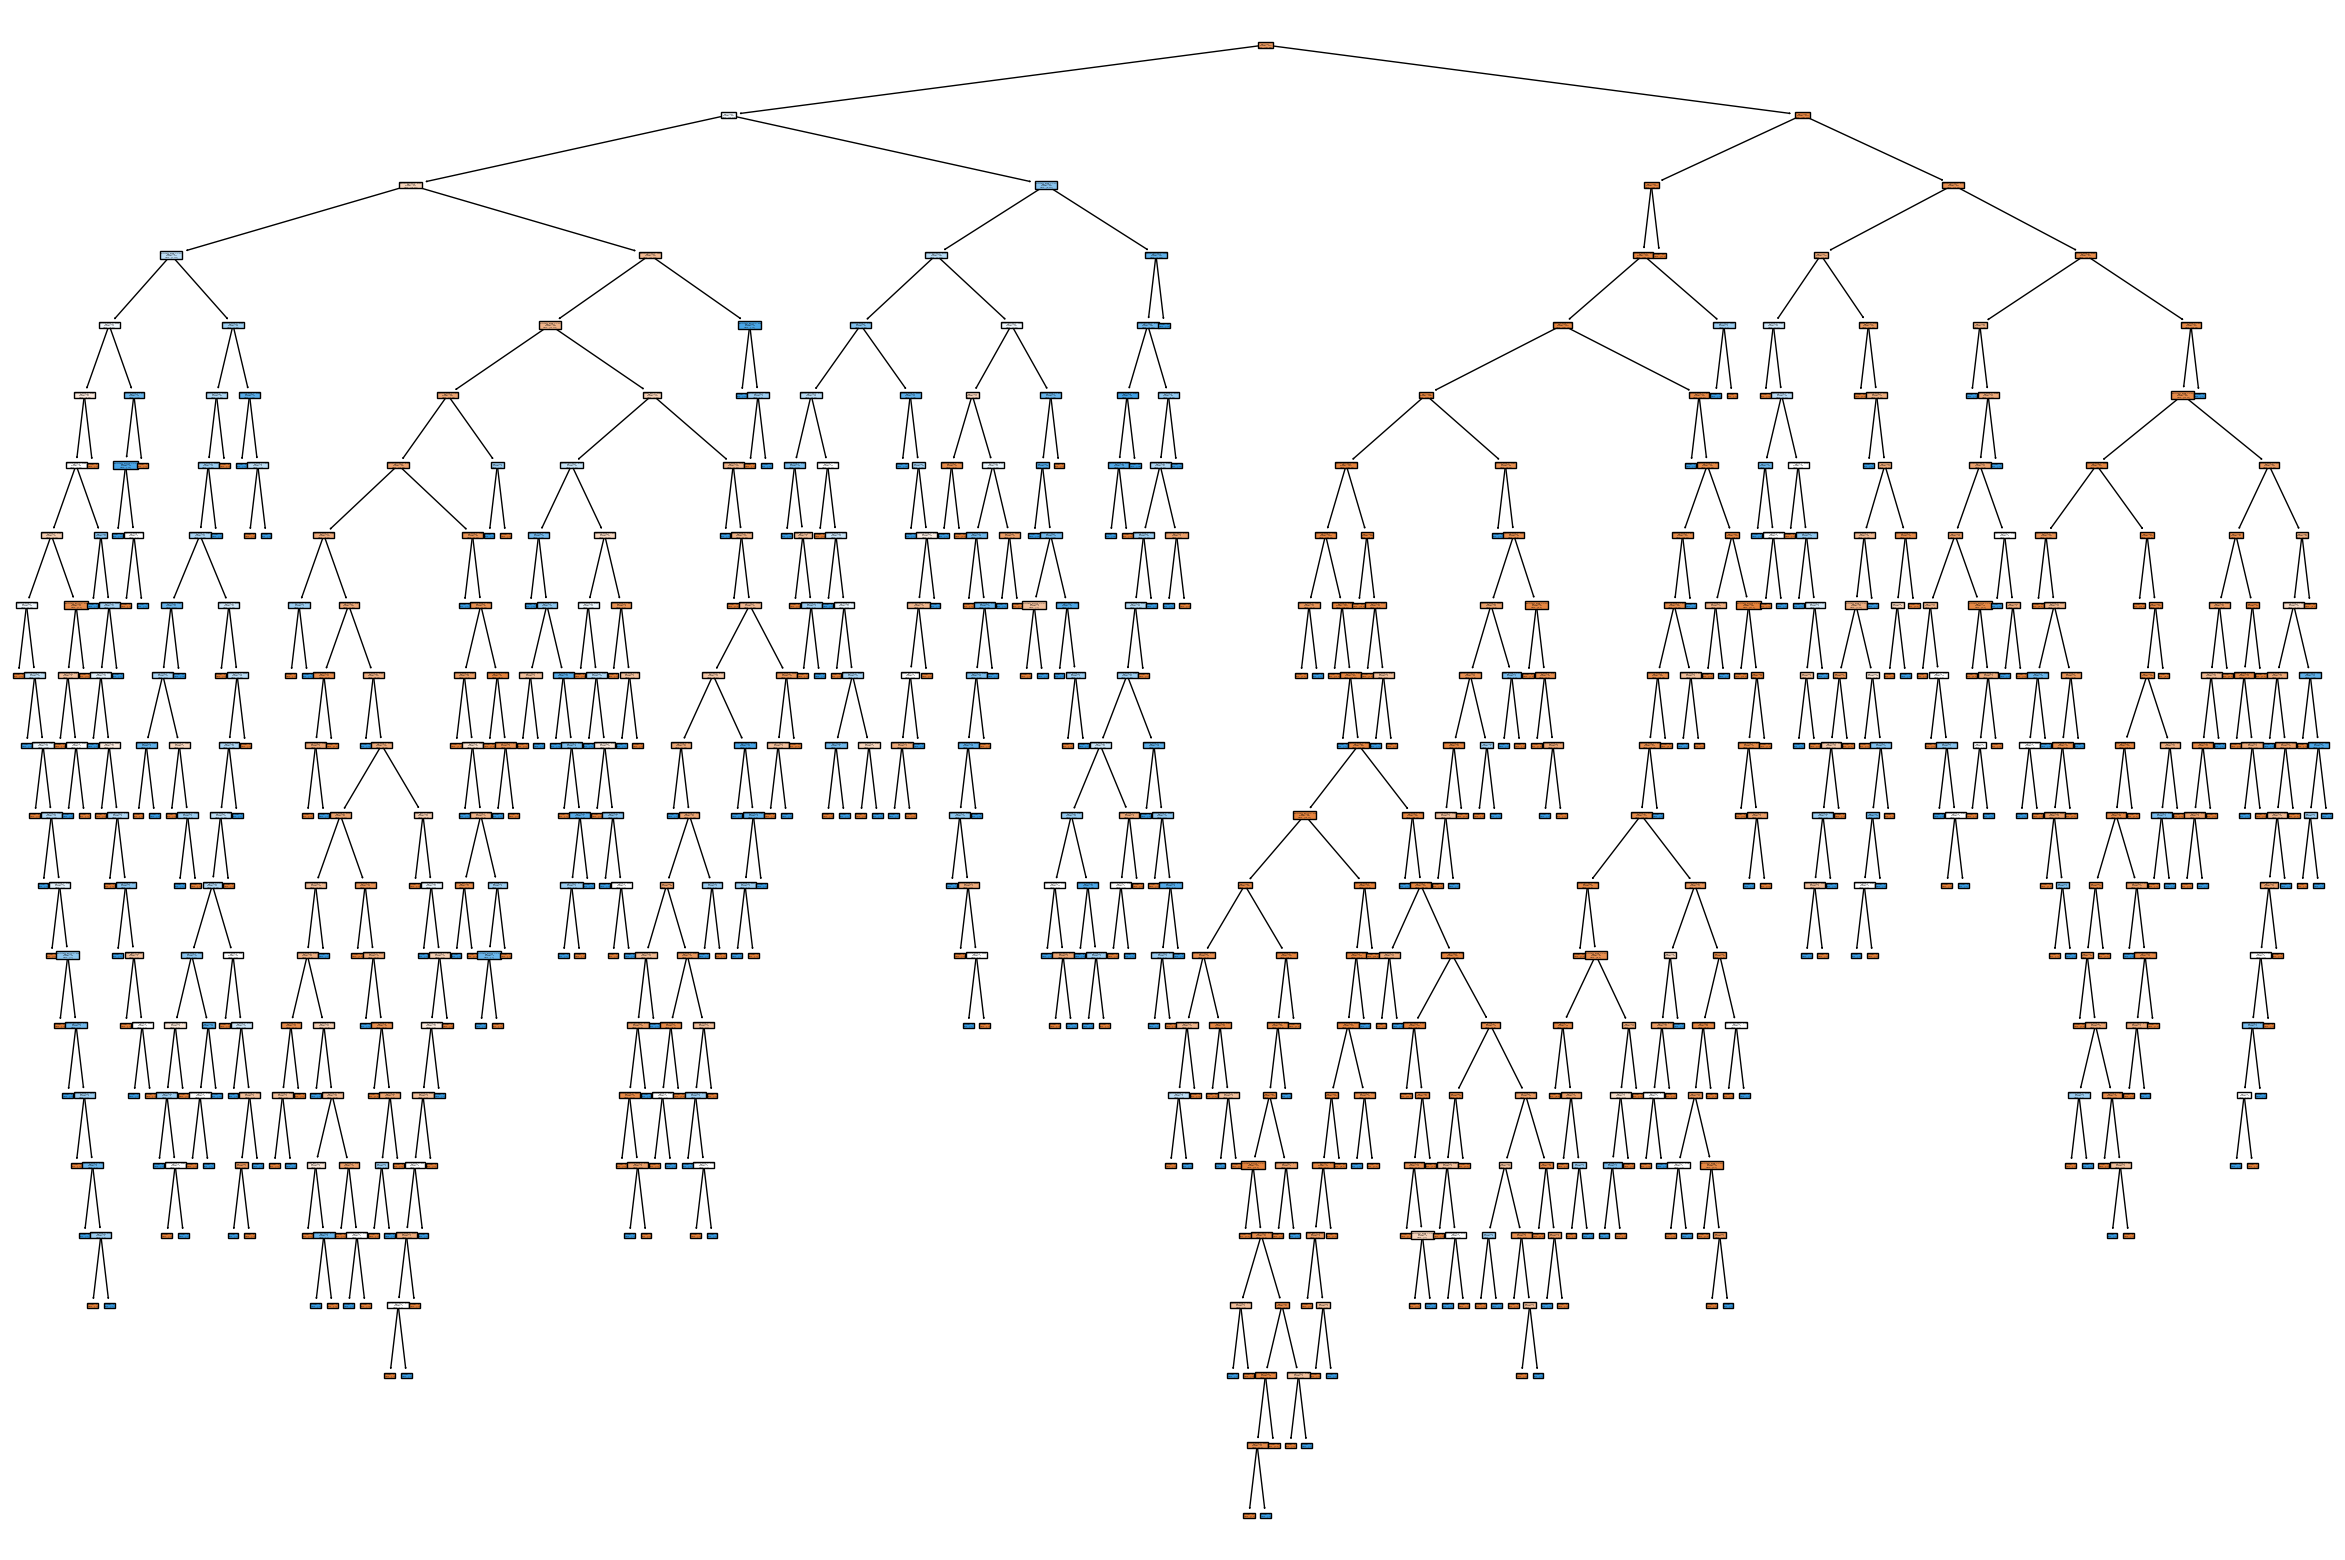

In [60]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

## Random Forest

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       849
           1       0.82      0.79      0.81       163

    accuracy                           0.94      1012
   macro avg       0.89      0.88      0.88      1012
weighted avg       0.94      0.94      0.94      1012

Model accuracy :  0.9387351778656127


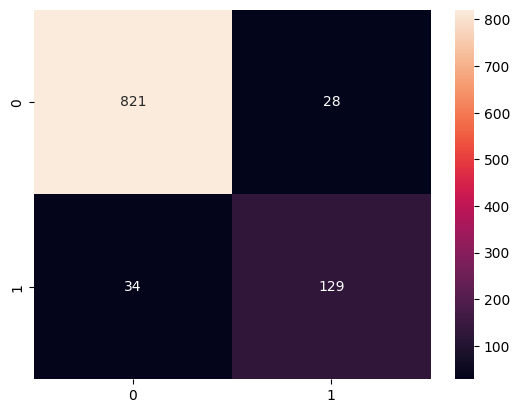

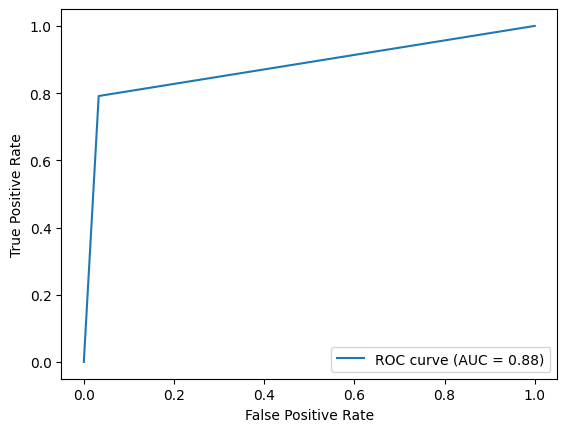

In [61]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Model accuracy : ', metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## XGBoost

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.86      0.79      0.82       163

    accuracy                           0.95      1012
   macro avg       0.91      0.88      0.90      1012
weighted avg       0.94      0.95      0.94      1012

Model accuracy :  0.9456521739130435


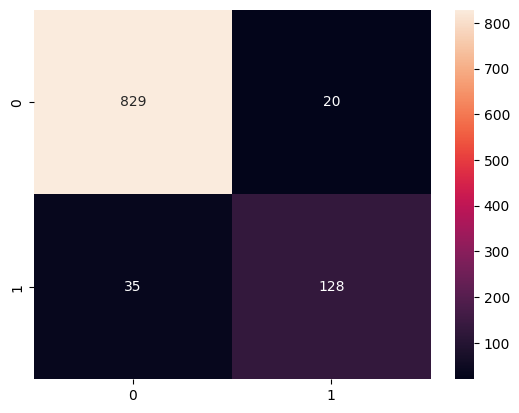

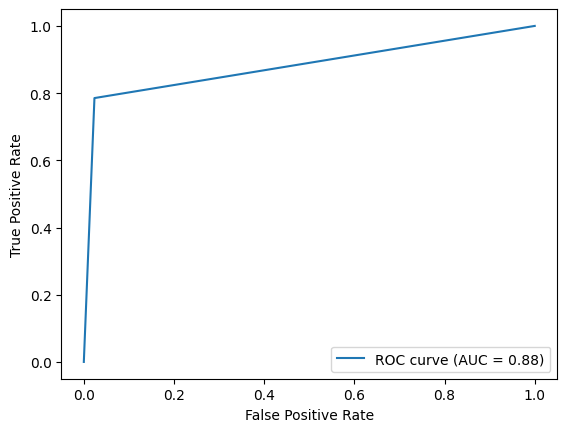

In [62]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Model accuracy : ', metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## CatBoost

0:	learn: 0.5892140	total: 5.05ms	remaining: 5.04s
1:	learn: 0.5091110	total: 9.83ms	remaining: 4.9s
2:	learn: 0.4511512	total: 18.8ms	remaining: 6.26s
3:	learn: 0.4096779	total: 24.8ms	remaining: 6.17s
4:	learn: 0.3770361	total: 38.1ms	remaining: 7.59s
5:	learn: 0.3509027	total: 42.6ms	remaining: 7.05s
6:	learn: 0.3292980	total: 54ms	remaining: 7.67s
7:	learn: 0.3149580	total: 62.8ms	remaining: 7.78s
8:	learn: 0.3048830	total: 66.6ms	remaining: 7.33s
9:	learn: 0.2971662	total: 74ms	remaining: 7.33s
10:	learn: 0.2895489	total: 82.5ms	remaining: 7.42s
11:	learn: 0.2852427	total: 84.4ms	remaining: 6.95s
12:	learn: 0.2816718	total: 93.5ms	remaining: 7.1s
13:	learn: 0.2765628	total: 104ms	remaining: 7.32s
14:	learn: 0.2737214	total: 108ms	remaining: 7.06s
15:	learn: 0.2694446	total: 111ms	remaining: 6.82s
16:	learn: 0.2672370	total: 113ms	remaining: 6.52s
17:	learn: 0.2646205	total: 115ms	remaining: 6.27s
18:	learn: 0.2609931	total: 117ms	remaining: 6.06s
19:	learn: 0.2584022	total: 119ms	

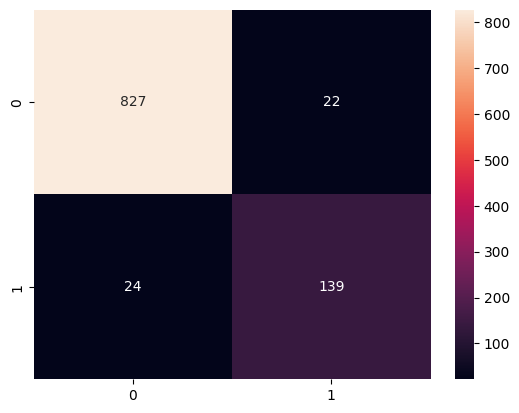

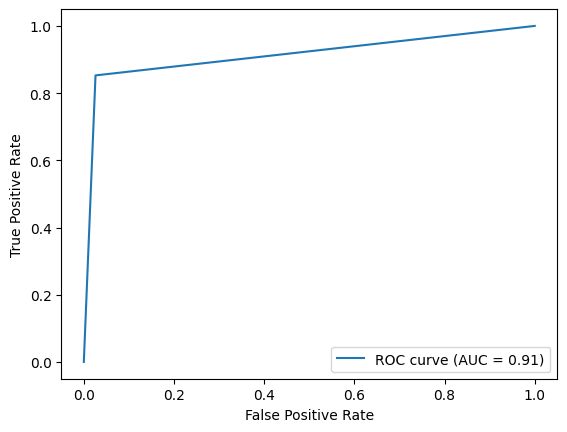

In [67]:
cb_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1)
cb_model.fit(X_train, y_train)

y_pred = cb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Model accuracy : ', metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## Conclusion

In conclusion, this notebook presents an in-depth customer churn classification project employing a diverse set of machine learning models, including Logistic Regression, Support Vector Machines, Decision Tree, Random Forest, XGBoost, and CatBoost. The primary objective is to accurately predict customer churn within a subscription-based service. Through meticulous experimentation and evaluation, we have demonstrated the commendable accuracy rates achieved by each model:


*   Logistic Regression - 0.879
*   Support Vector Machine - 0.864
*   Decision Tree - 0.956
*   Random Forest - 0.939
*   XGBoost - 0.946
*   CatBoost - 0.955

By showcasing these accuracy rates, this project not only provides insights into the predictive capabilities of each model but also offers a valuable resource for selecting the most appropriate model to predict customer churn and devise effective retention strategies within the subscription service.


## References


*   Dataset Source - https://www.kaggle.com/code/wonderdavid/e-commerce-customer-churn-prediction/input?select=E+Commerce+Dataset.xlsx

